<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [497]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [498]:
iowa_file = "/Users/meyhar/Desktop/ECON628-01-meyharmohd/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv"
iowa = pd.read_csv(iowa_file)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [499]:
iowa.head(3)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [500]:
iowa.tail(3).T

,270952,270953,270954
Date,10/20/2015,11/20/2015,01/27/2015
Store Number,5152,3562,4446
City,WATERLOO,WEST BURLINGTON,URBANDALE
Zip Code,50702,52655,50322
County Number,7,29,77
County,Black Hawk,Des Moines,Polk
Category,1.0113e+06,1.0829e+06,1.03108e+06
Category Name,TENNESSEE WHISKIES,MISC. IMPORTED CORDIALS & LIQUEURS,VODKA 80 PROOF
Vendor Number,85,192,260
Item Number,26826,65258,37993


In [501]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


1. Volume Sold has Outliers

In [502]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)


## Answer
The data is corrupted in the following way

1. There are missing values for county and category
2. There are dollar signs in the values of cost and price and sales
3. There are outliers in Volume sold
4. The names of cost and sales columns are not standardized

Therefore, i will first show the missing values and outliers and then perform the cleaning

In [503]:

iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

County Number, County, Category name have missing values

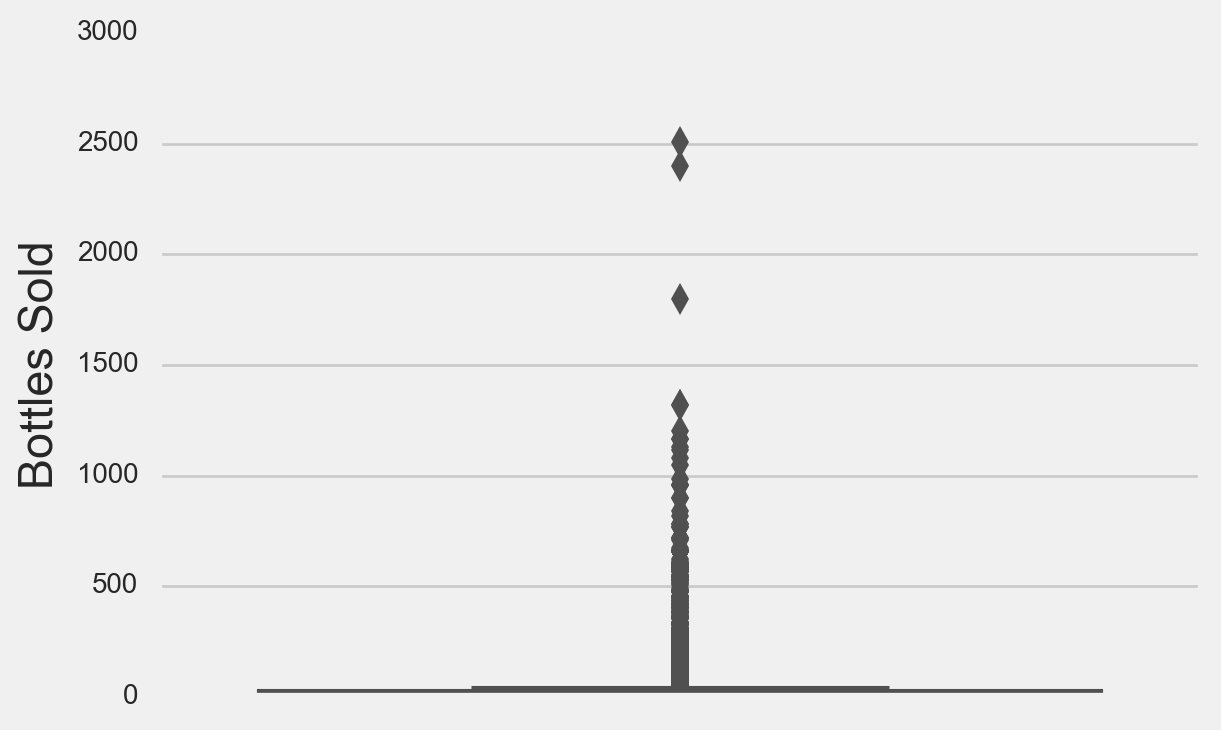

In [504]:
#Outliers

sns.boxplot(iowa['Bottles Sold'], orient='v', fliersize=8)
plt.show()

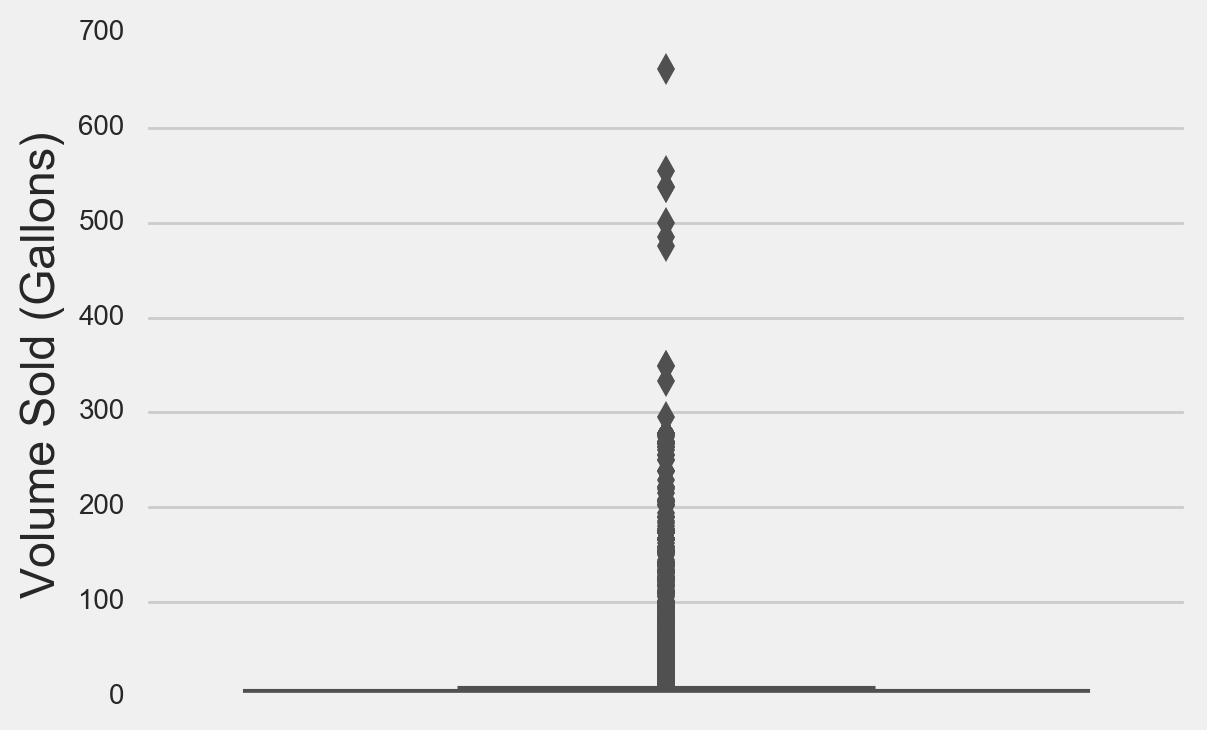

In [505]:
sns.boxplot(iowa['Volume Sold (Gallons)'], orient='v', fliersize=8)
plt.show()

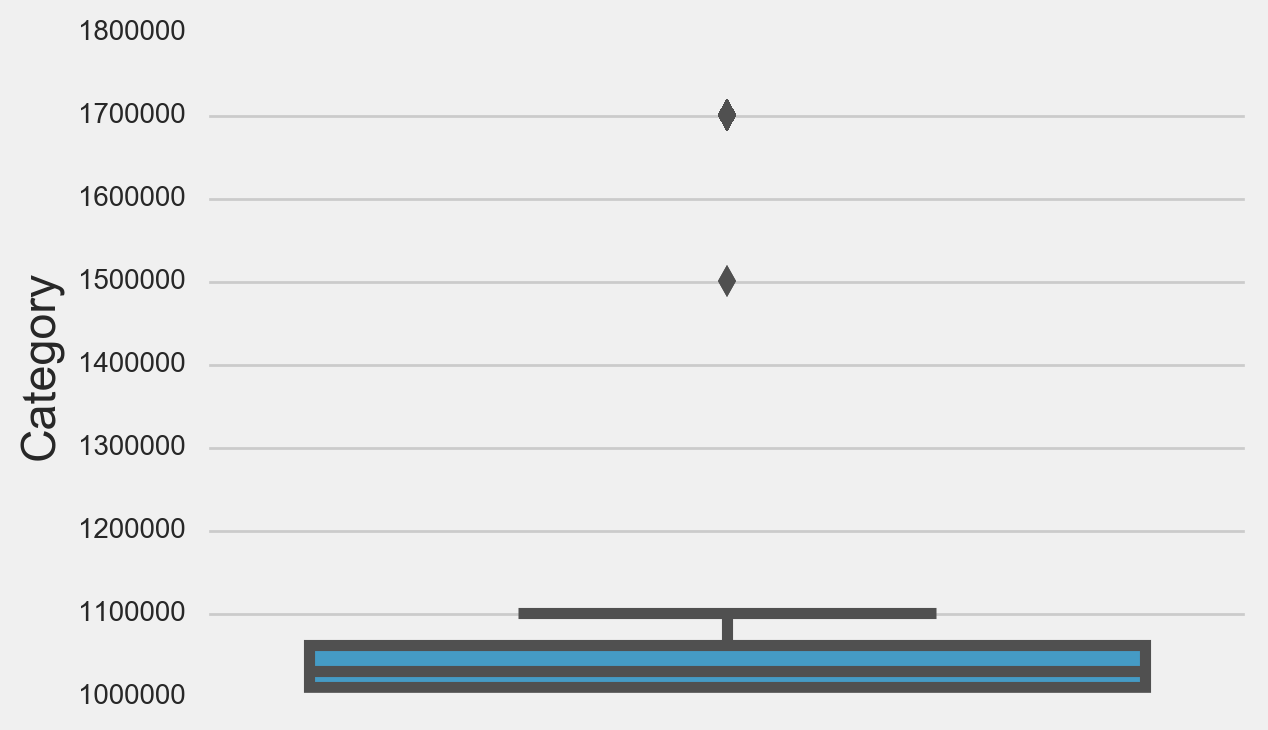

In [506]:
sns.boxplot(iowa['Category'], orient='v', fliersize=8)
plt.show()

In [507]:
#sns.boxplot(iowa['Total Sales (Dollars)'], orient='v', fliersize=8)
#plt.show()

We see that, Total Sales, Bottles Sold and Volume Sold have a lot of outliers to be dealt with.

### 3.2 Clean the columns

In [508]:
iowa.rename(columns={'State Bottle Retail':'MRP/Bottle (Dollars)',
                  'Sale (Dollars)':'Total Sales (Dollars)',
                     'State Bottle Cost':'Cost/Bottle (Dollars)',
                   'Item Description': 'Bottle Description',
                    }, inplace=True)


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [509]:
#Remove Dollar Sign
def dollarsign_remove(y):
    iowa[y] = iowa[y].str.replace('$', '').astype(float)
    
dollarsign_remove('Cost/Bottle (Dollars)')
dollarsign_remove('Total Sales (Dollars)')
dollarsign_remove('MRP/Bottle (Dollars)')

In [510]:
#Normalizing Volume sold

volume_sold_norm = iowa['Volume Sold (Gallons)'].values
vol_mean= np.mean(volume_sold_norm)
vol_sd= np.std(volume_sold_norm)

print vol_mean
print vol_sd

#vol_sold_norm = iowa.rate_of_crime.values

#roc_mean = np.mean(rate_of_crime)
#roc_std = np.std(rate_of_crime

2.3728304331
7.63816745404


In [511]:
vol_norm= (volume_sold_norm - vol_mean)/ vol_sd

In [512]:
outlier_vol = (np.abs(vol_norm) < 30)


In [513]:
iowa['Volume Sold (Gallons)'].describe()

count    270955.000000
mean          2.372830
std           7.638182
min           0.030000
25%           0.400000
50%           1.390000
75%           2.770000
max         662.540000
Name: Volume Sold (Gallons), dtype: float64

In [514]:
iowa['Bottles Sold'].describe()

count    270955.000000
mean          9.871285
std          24.040912
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        2508.000000
Name: Bottles Sold, dtype: float64

In [515]:
#iowa = iowa[['Volume Sold (Gallons)'] > ]


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


## Answer
1. Extract month and year separately from date format
2. Have month and year column pair
3. Create a dummy for whether sales was in year 2015
4. Group sales by month
5. Sum of months 1-12 is 78. So if a store sold in all months of 2015, the sum of months of sales per month will be 78
6. Create a dummy of whether the sum of months is 78 or no.
7. The stores with months sum < 78 are problem stores

## Plan of action with problem stores
For this analysis, I create a mask with just the non-problem stores in year 2015 and work with them.

In [516]:
#1.0 Extracting month and year separately from date format

import datetime
iowa['year'] = pd.DatetimeIndex(iowa['Date']).year
iowa['month'] = pd.DatetimeIndex(iowa['Date']).month

#Source:http://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python

In [517]:
#1.1 Having month-year column to have month year pair

iowa['Date']= pd.to_datetime(iowa['Date'])
iowa['month_year'] = iowa['Date'].apply(lambda x: x.strftime('%B-%Y'))

In [518]:
iowa['year_2015'] = iowa['year'].map(lambda value: 1 if value == 2015 else 0 )

In [519]:
iowa_yr_2015 = iowa[iowa['year_2015']==1]

In [522]:
iowa.groupby(['month'],sort=True)

In [523]:
iowa_month=iowa_yr_2015.groupby(['Store Number', 'month'],sort=True)['Bottles Sold'].sum().reset_index()

In [524]:
iowa_month_tot=iowa_month.groupby(['Store Number'])[['Bottles Sold', 'month']].sum().reset_index()
iowa_month_tot

,Store Number,Bottles Sold,month
0,2106,10367,78
1,2113,671,78
2,2130,7430,78
3,2152,573,78
4,2178,1928,78
5,2190,11111,78
6,2191,7696,78
7,2200,1668,78
8,2205,1882,78
9,2228,1312,78


In [525]:
iowa_month_tot['month_sales'] = iowa_month_tot['month'].map(lambda value: 0 if value < 78 else 1 )

In [526]:
iowa_month_tot

,Store Number,Bottles Sold,month,month_sales
0,2106,10367,78,1
1,2113,671,78,1
2,2130,7430,78,1
3,2152,573,78,1
4,2178,1928,78,1
5,2190,11111,78,1
6,2191,7696,78,1
7,2200,1668,78,1
8,2205,1882,78,1
9,2228,1312,78,1


In [527]:
iowa_month_tot['month_sales'].value_counts()

#There are 542 problem stores

1    830
0    542
Name: month_sales, dtype: int64

### We have 542 problem stores. I shall create a separate mask for stores open in 2015 and continue the annual analysis just with those stores. 

In [528]:
#Created a mask with just non problematic stores
iowa_noprob = iowa_month_tot[iowa_month_tot['month_sales']==1]

In [529]:
iowa=pd.merge(iowa, iowa_noprob, on='Store Number', how='left')


In [530]:
del iowa['month_sales']

In [531]:
iowa.rename(columns={'Bottles Sold_y':'Bottles Sold month',
                  'month_x':'month',
                    }, inplace=True)


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [532]:
iowa[iowa['year_2015']==1]['Total Sales (Dollars)'].groupby(iowa['Store Number']).sum().reset_index()

,Store Number,Total Sales (Dollars)
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43
3,2152,7721.08
4,2178,24324.18
5,2190,121689.06
6,2191,125093.49
7,2200,22811.55
8,2205,24681.39
9,2228,17462.07


In [533]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottles Sold_x,Total Sales (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,month_year,year_2015,Bottles Sold month,month_y
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,12,81.00,9.0,2.38,2015,11,November-2015,1,632.0,78.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,2,41.26,1.5,0.40,2016,3,March-2016,0,10051.0,78.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,24,453.36,24.0,6.34,2016,2,February-2016,0,10367.0,78.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,6,85.50,10.5,2.77,2016,2,February-2016,0,10924.0,78.0
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,12,129.60,21.0,5.55,2015,8,August-2015,1,731.0,78.0


### 5.2 Calculate the profit each store is making in 2015.


In [534]:


iowa['Total Cost (Dollars)']= iowa['Cost/Bottle (Dollars)']*iowa['Bottles Sold_x']
iowa['profit']= iowa['Total Sales (Dollars)']- iowa['Total Cost (Dollars)']



## How to calculate profit per store
1. Total cost = cost per bottle * number of bottles
2. Total sales= Retail price bottle * number of bottles (given in df)
3. profit = Total sales - total cost

Then we group by store number

In [535]:
iowa[iowa['year_2015']==1]['profit'].groupby(iowa['Store Number']).sum().reset_index()

,Store Number,profit
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70
5,2190,40617.73
6,2191,41744.39
7,2200,7653.47
8,2205,8244.13
9,2228,5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

Since we need to find profit by county, we look at the total profit made grouped by county and divide by the total gallons sold by the county.

We do this to see the profit per gallon sold by county. 

In [536]:
profit_county=iowa[iowa['year_2015']==1]['profit'].groupby(iowa['County']).sum()


In [537]:
gallons_county=iowa[iowa['year_2015']==1]['Volume Sold (Gallons)'].groupby(iowa['County']).sum()



### Calculating profit per county

Total profit made my county/ gallons sold by county

In [538]:

profit_gallon_county=profit_county / gallons_county
profit_gallon_county.sort_values(inplace=True)



In [539]:
profit_gallon_county.reset_index()

,County,0
0,Hancock,13.045108
1,Pocahontas,13.669292
2,Butler,13.868685
3,Keokuk,14.334868
4,Audubon,14.408834
5,Worth,14.422709
6,Mitchell,14.643295
7,Wright,14.648298
8,Grundy,14.729247
9,Madison,14.735313


### Answer
1. Dallas
2. Johnson
3. Polk
4. Scott
5. Jefferson

These counties have the highest sale per gallon sold.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

### Answer

Size of store = total gallons sold in 2015

Profit/Total gallons sold

1. Calculate total profit per gallon sold per store in 2015
2. Calculate profit to store size ratio per store in 2015
3. Plot profit to gallons sold

In [540]:


iowa['profit_pergallon']= iowa['profit'] / iowa['Volume Sold (Gallons)']
iowa[iowa['year_2015']==1]['profit_pergallon'].groupby(iowa['Store Number']).sum().reset_index()

,Store Number,profit_pergallon
0,2106,11879.073749
1,2113,3432.886408
2,2130,8332.178185
3,2152,2321.749034
4,2178,4804.282075
5,2190,38584.506252
6,2191,14316.872038
7,2200,8490.972560
8,2205,6968.804708
9,2228,5399.358092


In [541]:
store_size=iowa[iowa['year_2015']==1][['profit', 'Volume Sold (Gallons)']].groupby(iowa['Store Number']).sum()
store_size

store_size.describe()

,profit,Volume Sold (Gallons)
count,1372.000000,1372.000000
mean,6953.468936,382.507697
std,17010.497562,851.832364
min,13.340000,0.200000
25%,1070.252500,61.320000
50%,2417.480000,139.635000
75%,6483.000000,365.095000
max,333816.910000,16356.020000


In [542]:
store_size.reset_index()

,Store Number,profit,Volume Sold (Gallons)
0,2106,48838.08,2571.33
1,2113,3109.04,174.29
2,2130,37325.20,1820.65
3,2152,2587.53,167.28
4,2178,8165.70,506.50
5,2190,40617.73,1671.50
6,2191,41744.39,2127.56
7,2200,7653.47,480.01
8,2205,8244.13,411.31
9,2228,5844.34,361.37


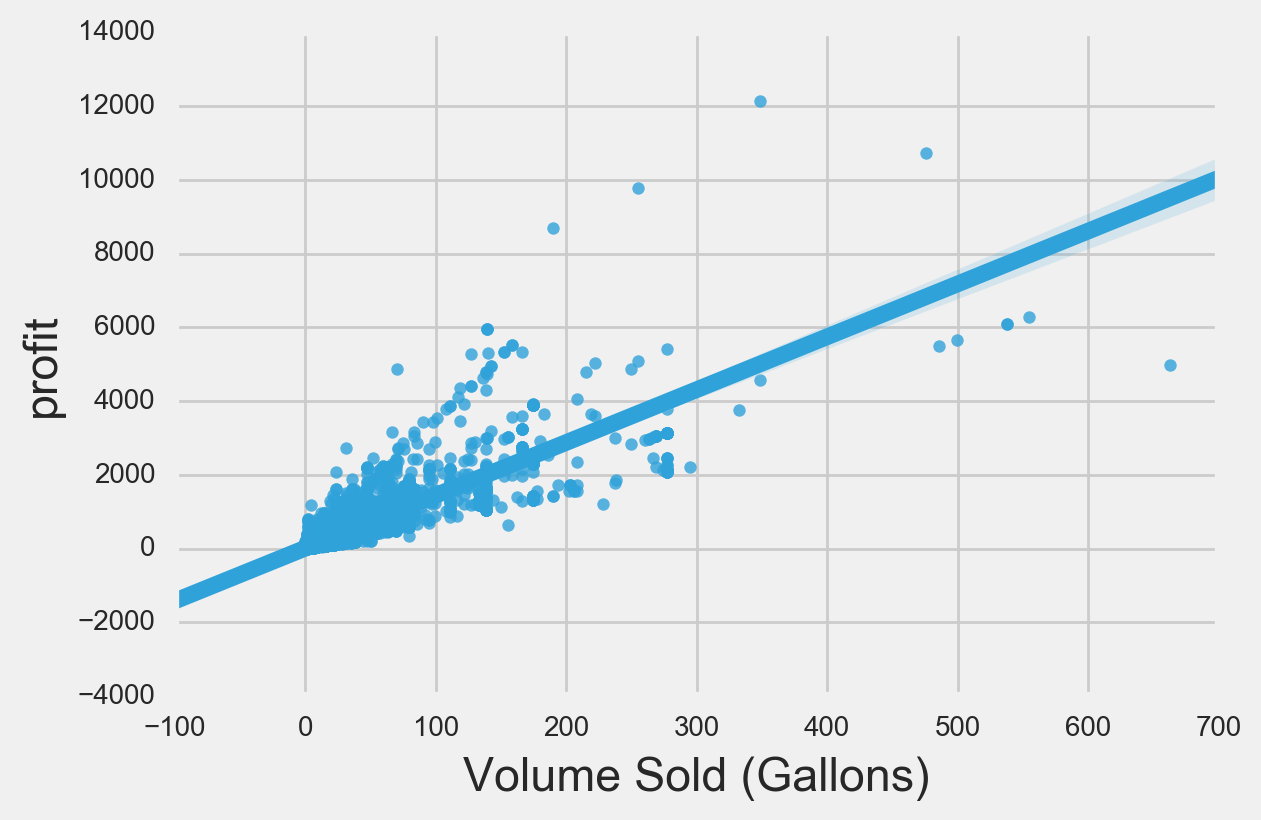

In [543]:

ax = sns.regplot(x="Volume Sold (Gallons)", y="profit", data=iowa)


In [544]:
# If we just look at year 2015
iowa_yr_2015 = iowa[iowa['year_2015']==1]

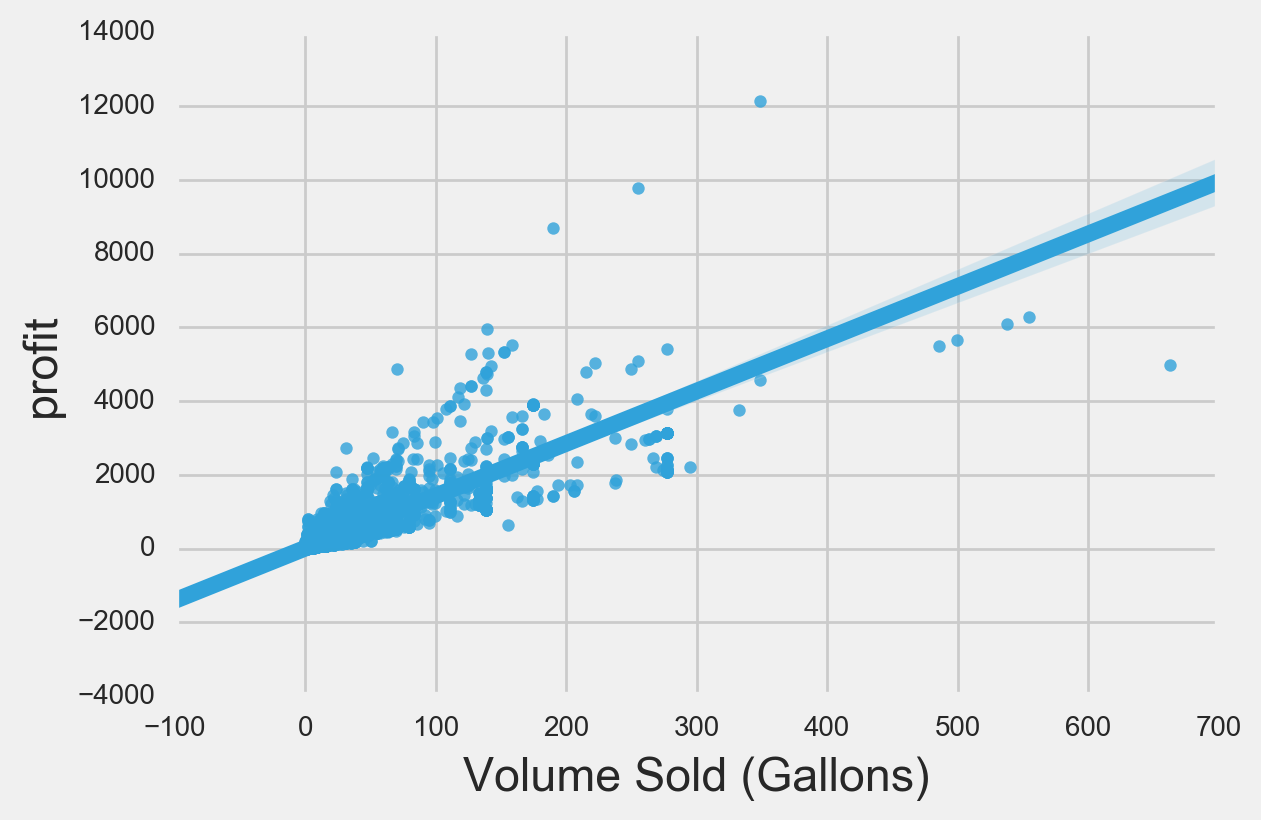

In [545]:
ax = sns.regplot(x="Volume Sold (Gallons)", y="profit", data=iowa_yr_2015)


In [546]:
store_size.corr()

,profit,Volume Sold (Gallons)
profit,1.000000,0.992497
Volume Sold (Gallons),0.992497,1.000000


#### Ans

We see a positive relation between store size and profit for stores that were open fully functional throughout the year 2015 and stores in 2015&2016 as well.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [547]:
iowa_category= iowa[['Category Name', 'Category']]
iowa_category.sort_values('Category', ascending=True)
iowa_category



,Category Name,Category
0,APRICOT BRANDIES,1051100.0
1,BLENDED WHISKIES,1011100.0
2,STRAIGHT BOURBON WHISKIES,1011200.0
3,AMERICAN COCKTAILS,1071100.0
4,VODKA 80 PROOF,1031080.0
5,AMERICAN DRY GINS,1041100.0
6,AMERICAN GRAPE BRANDIES,1051010.0
7,CANADIAN WHISKIES,1012100.0
8,IMPORTED VODKA,1032080.0
9,CINNAMON SCHNAPPS,1081315.0


In [548]:
iowa['category_code'] = iowa['Category'].map(lambda x:( x/10000))
iowa['category_code'] = np.round(iowa['category_code'])

iowa['category_code'].value_counts()

#101-Whiskies
#102-Tequila
#103-Vodka
#104-Gin
#105-Brandies
#106-Rum
#107-Cocktails
#108-Misc Liquors
#109-
#110-Misc
#150-Misc
#170-Misc

#drop 150 and 109

101.0    73446
103.0    70059
108.0    48545
106.0    32799
105.0    15268
102.0    12172
104.0     9917
107.0     6929
170.0     1159
110.0      573
109.0       18
150.0        2
Name: category_code, dtype: int64

In [549]:
iowa.category_code=iowa.category_code.apply(lambda x: 'Whiskies' if x == 101 else 'Tequila' if x == 102 else 'Vodka' if x== 103 else 'Gin' if x==104 else 'Brandy' if x==105 else 'Rum' if x==106 else 'Cocktail' if x== 107 else 'Misc Liquor' if x==108 else 'American Alcohol' if x==110 else 'American Beer' if x==150 else x)


In [550]:
# Remove category 170 and 109
iowa_not= iowa[iowa['category_code']==109]


In [551]:
# Deleting observations that are not liquor
#iowa.drop([iowa['category_code']==109], axis=1, inplace=True)

In [552]:
iowa['category_code'].value_counts()

Whiskies            73446
Vodka               70059
Misc Liquor         48545
Rum                 32799
Brandy              15268
Tequila             12172
Gin                  9917
Cocktail             6929
170.0                1159
American Alcohol      573
109.0                  18
American Beer           2
Name: category_code, dtype: int64

In [553]:
iowa = iowa[iowa['category_code']!=170]

In [554]:
iowa = iowa[iowa['category_code']!=109]

### 5.6 Do relationships exist between the broader liquor type and profit?

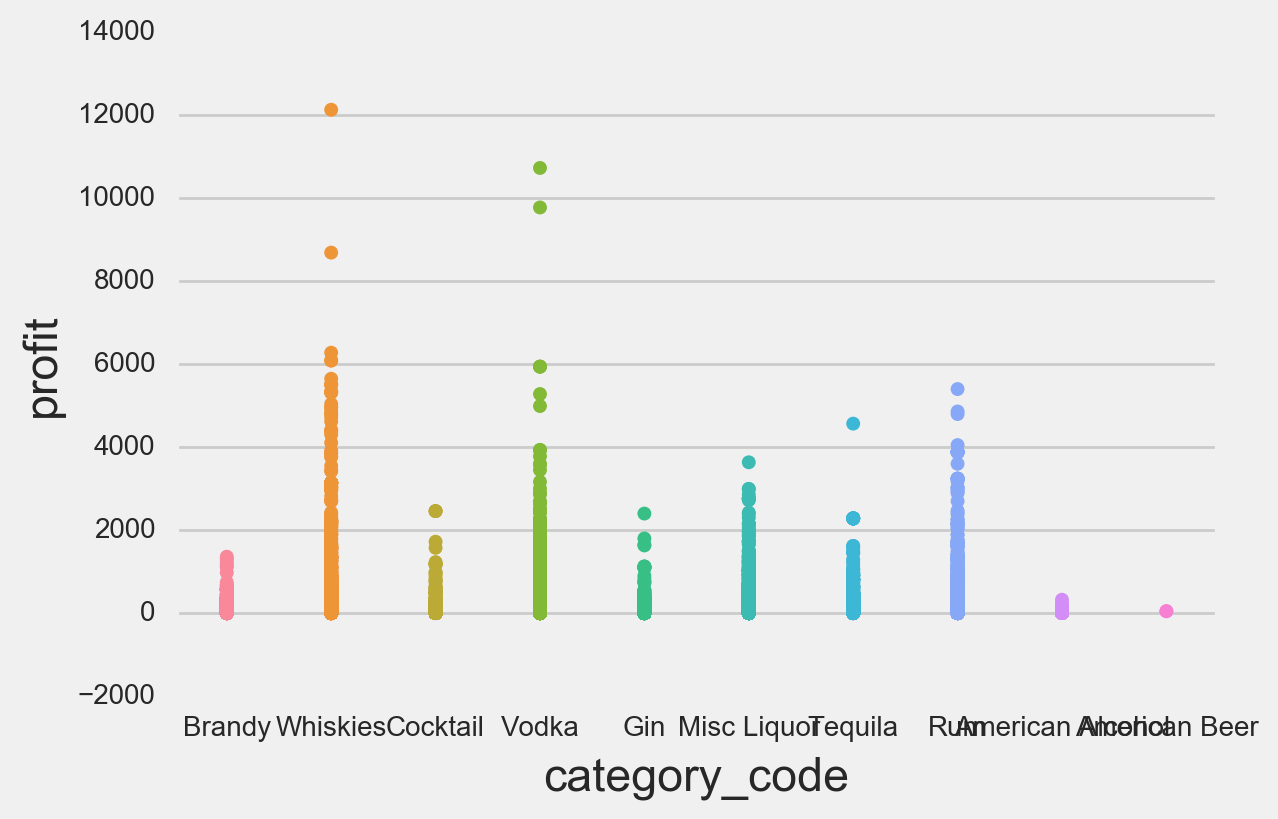

In [555]:
sns.stripplot(x="category_code", y="profit", data=iowa)

#Plot category code as bx plot against volume per liquor sold as well
#correlation heat map and correlation coeff

#### We see that Cocktails, Vodka, Rum and whiskey are associated with the most profitable type of category.


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

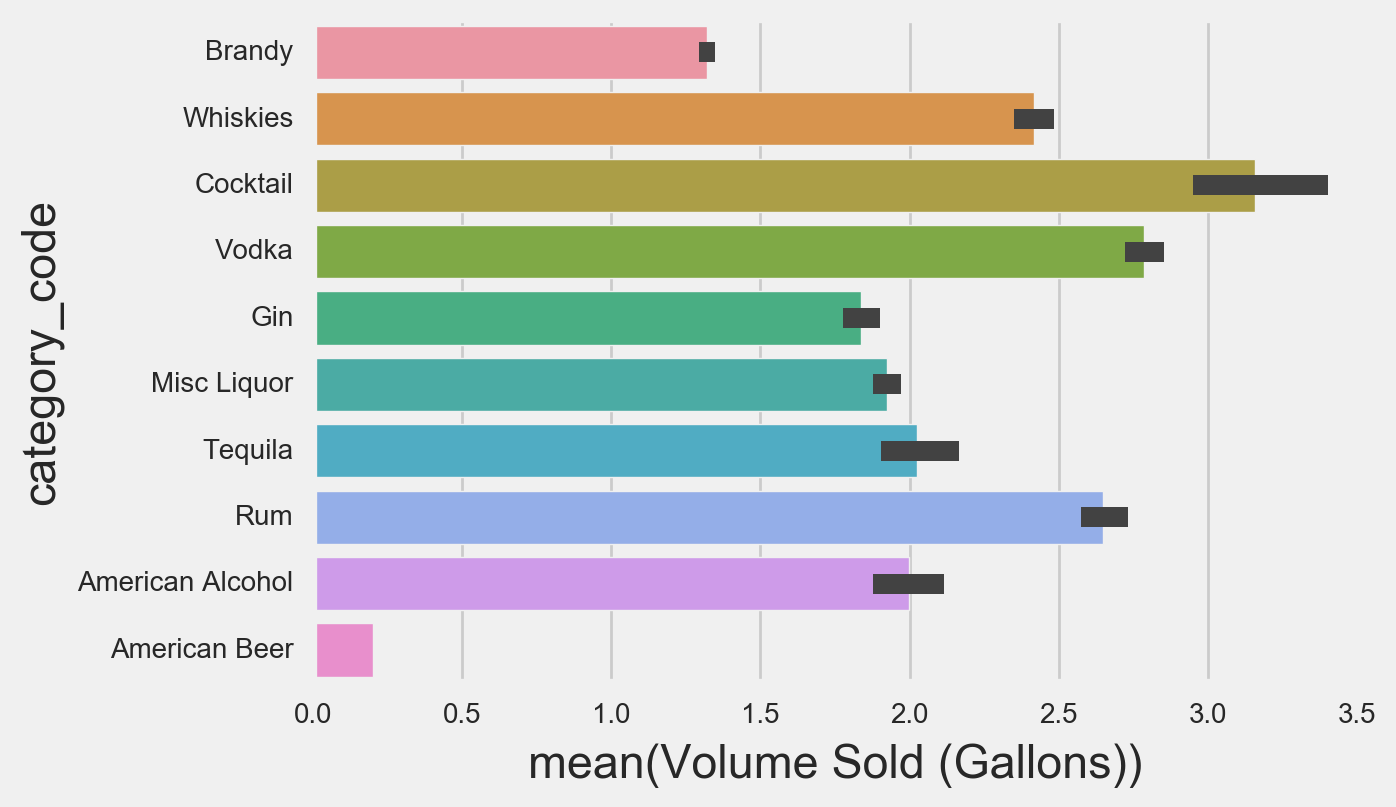

In [556]:
sns.barplot(x="Volume Sold (Gallons)", y="category_code", data=iowa)

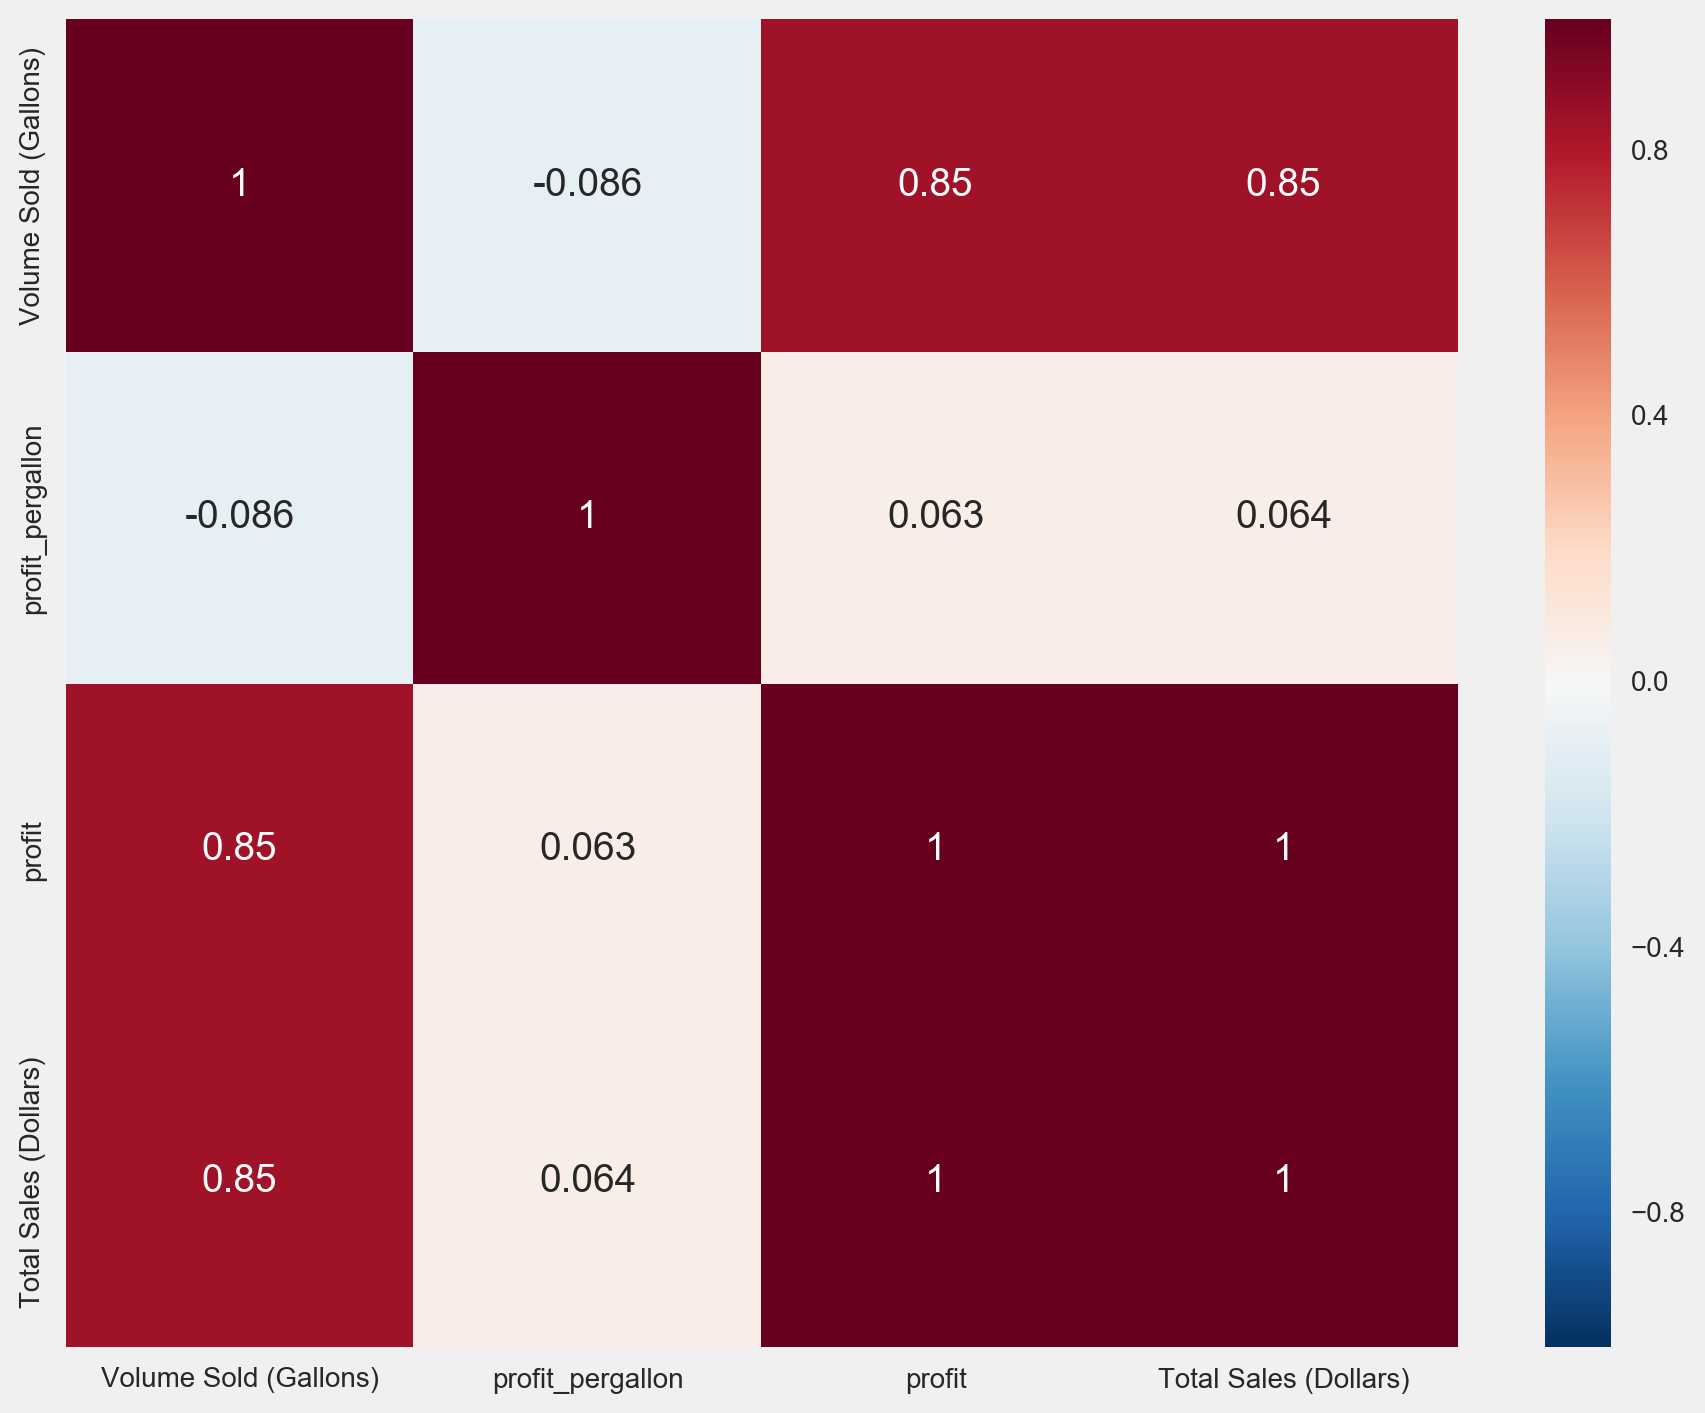

In [557]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(iowa[['Volume Sold (Gallons)', 'profit_pergallon', 'category_code', 'profit', 'Total Sales (Dollars)']].corr(),annot=True, ax=ax)
plt.show()

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [558]:
#Any store below 75 percentile of volume sold can be considered as a mom and pop store.

store_size['mom_pop'] = store_size['Volume Sold (Gallons)'].map(lambda value: 1 if value < 365.05 else 0 )
store_size=store_size.reset_index()



#If yes, then tax on volume sold of liquor store i.e. progressive taxation
#If no, then standard tax on hard liquor



In [559]:
#Relationship between being mom and pop store and brand of liquor

iowa=pd.merge(iowa, store_size, on='Store Number', how='left')

In [560]:
iowa_mp=iowa.groupby(['category_code', 'mom_pop'])['Volume Sold (Gallons)_x'].mean().reset_index()


In [561]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,year_2015,Bottles Sold month,month_y,Total Cost (Dollars),profit_x,profit_pergallon,category_code,profit_y,Volume Sold (Gallons)_y,mom_pop
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,1,632.0,78.0,54.00,27.00,11.344538,Brandy,3011.02,181.03,1.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,0,10051.0,78.0,27.50,13.76,34.400000,Whiskies,47695.76,2607.23,0.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,0,10367.0,78.0,302.16,151.20,23.848580,Whiskies,48838.08,2571.33,0.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,0,10924.0,78.0,57.00,28.50,10.288809,Cocktail,48430.73,2631.00,0.0
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1,731.0,78.0,86.40,43.20,7.783784,Vodka,3163.70,216.52,1.0


In [562]:
iowa_mp_bottle= iowa.groupby(['category_code', 'mom_pop'])['Bottles Sold_x'].sum().reset_index()

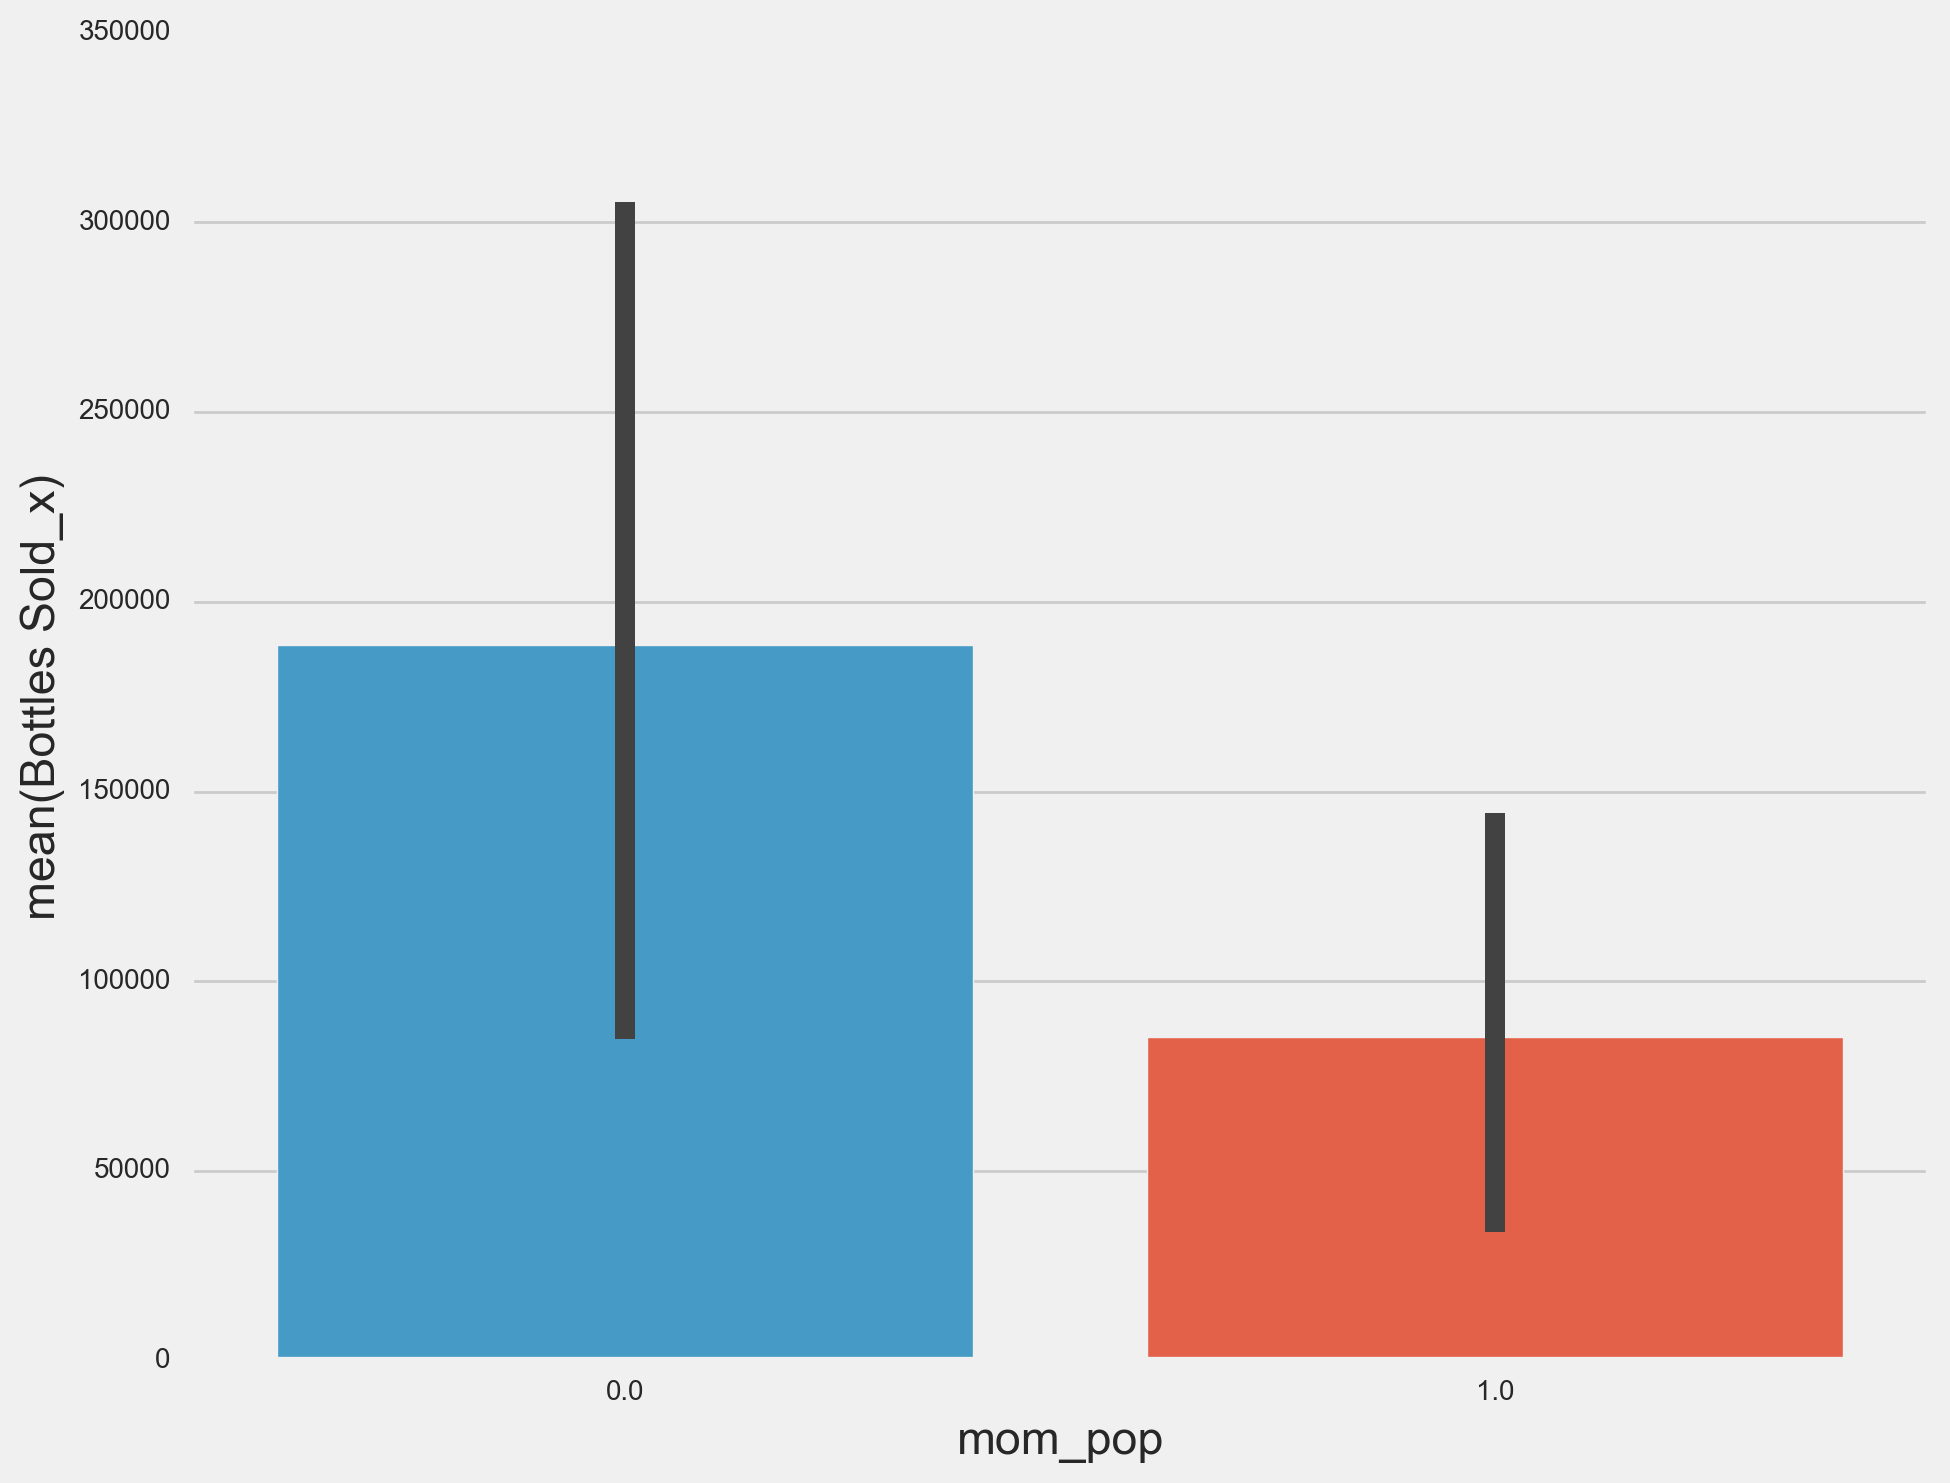

In [563]:
fig = plt.figure(figsize=(10,8))

sns.barplot(x="mom_pop", y="Bottles Sold_x", data=iowa_mp_bottle)
plt.legend(loc='upper left')

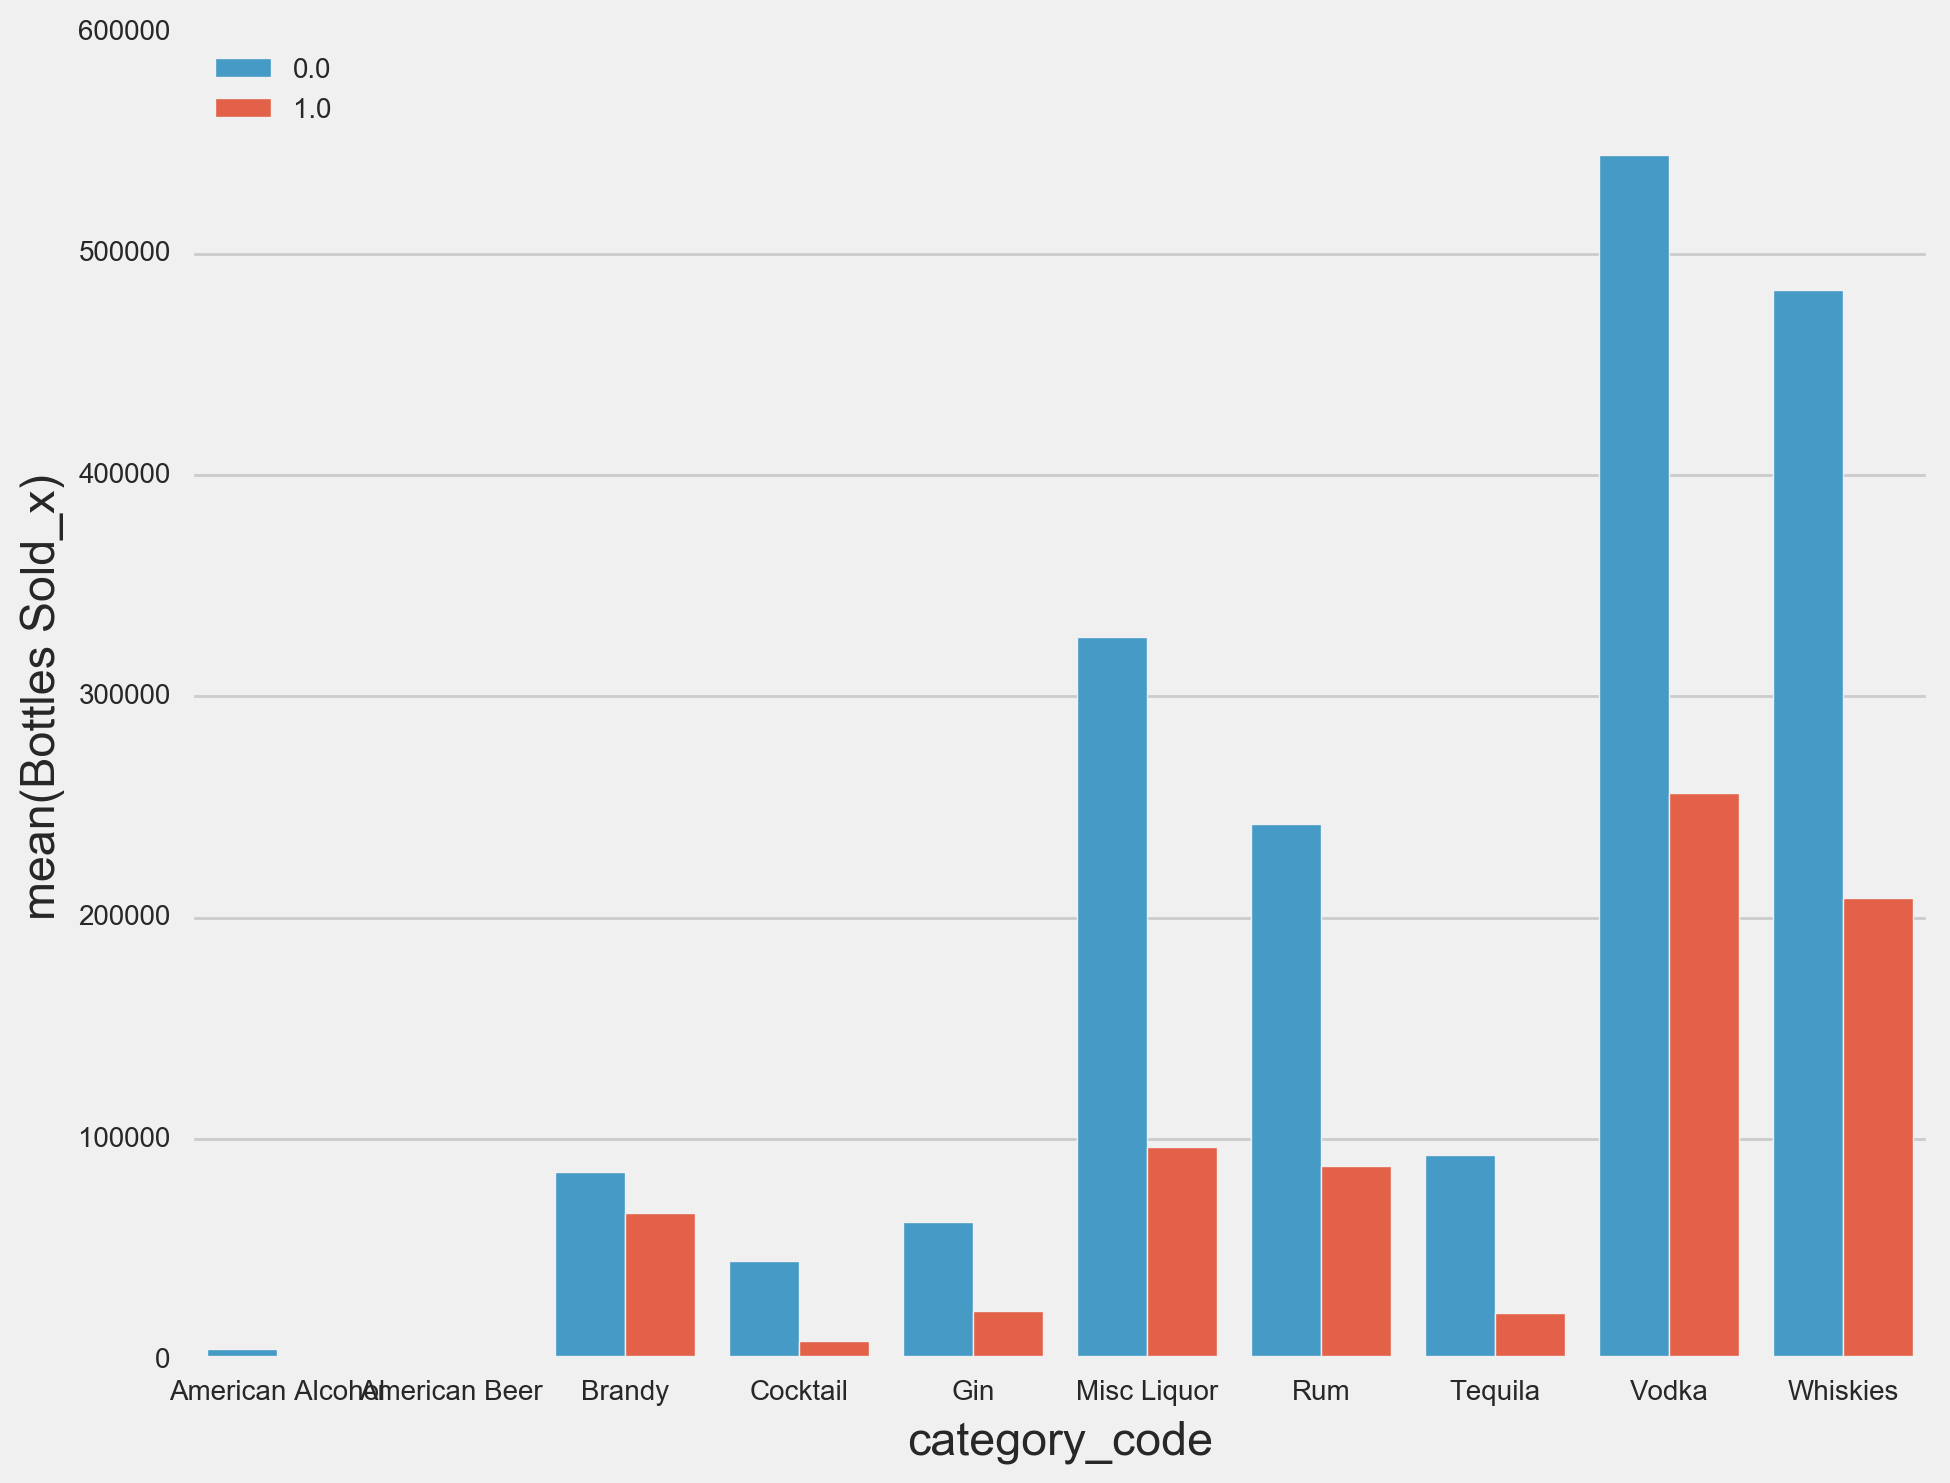

In [564]:
fig = plt.figure(figsize=(10,8))

sns.barplot(x="category_code", y="Bottles Sold_x", hue="mom_pop", data=iowa_mp_bottle)
plt.legend(loc='upper left')

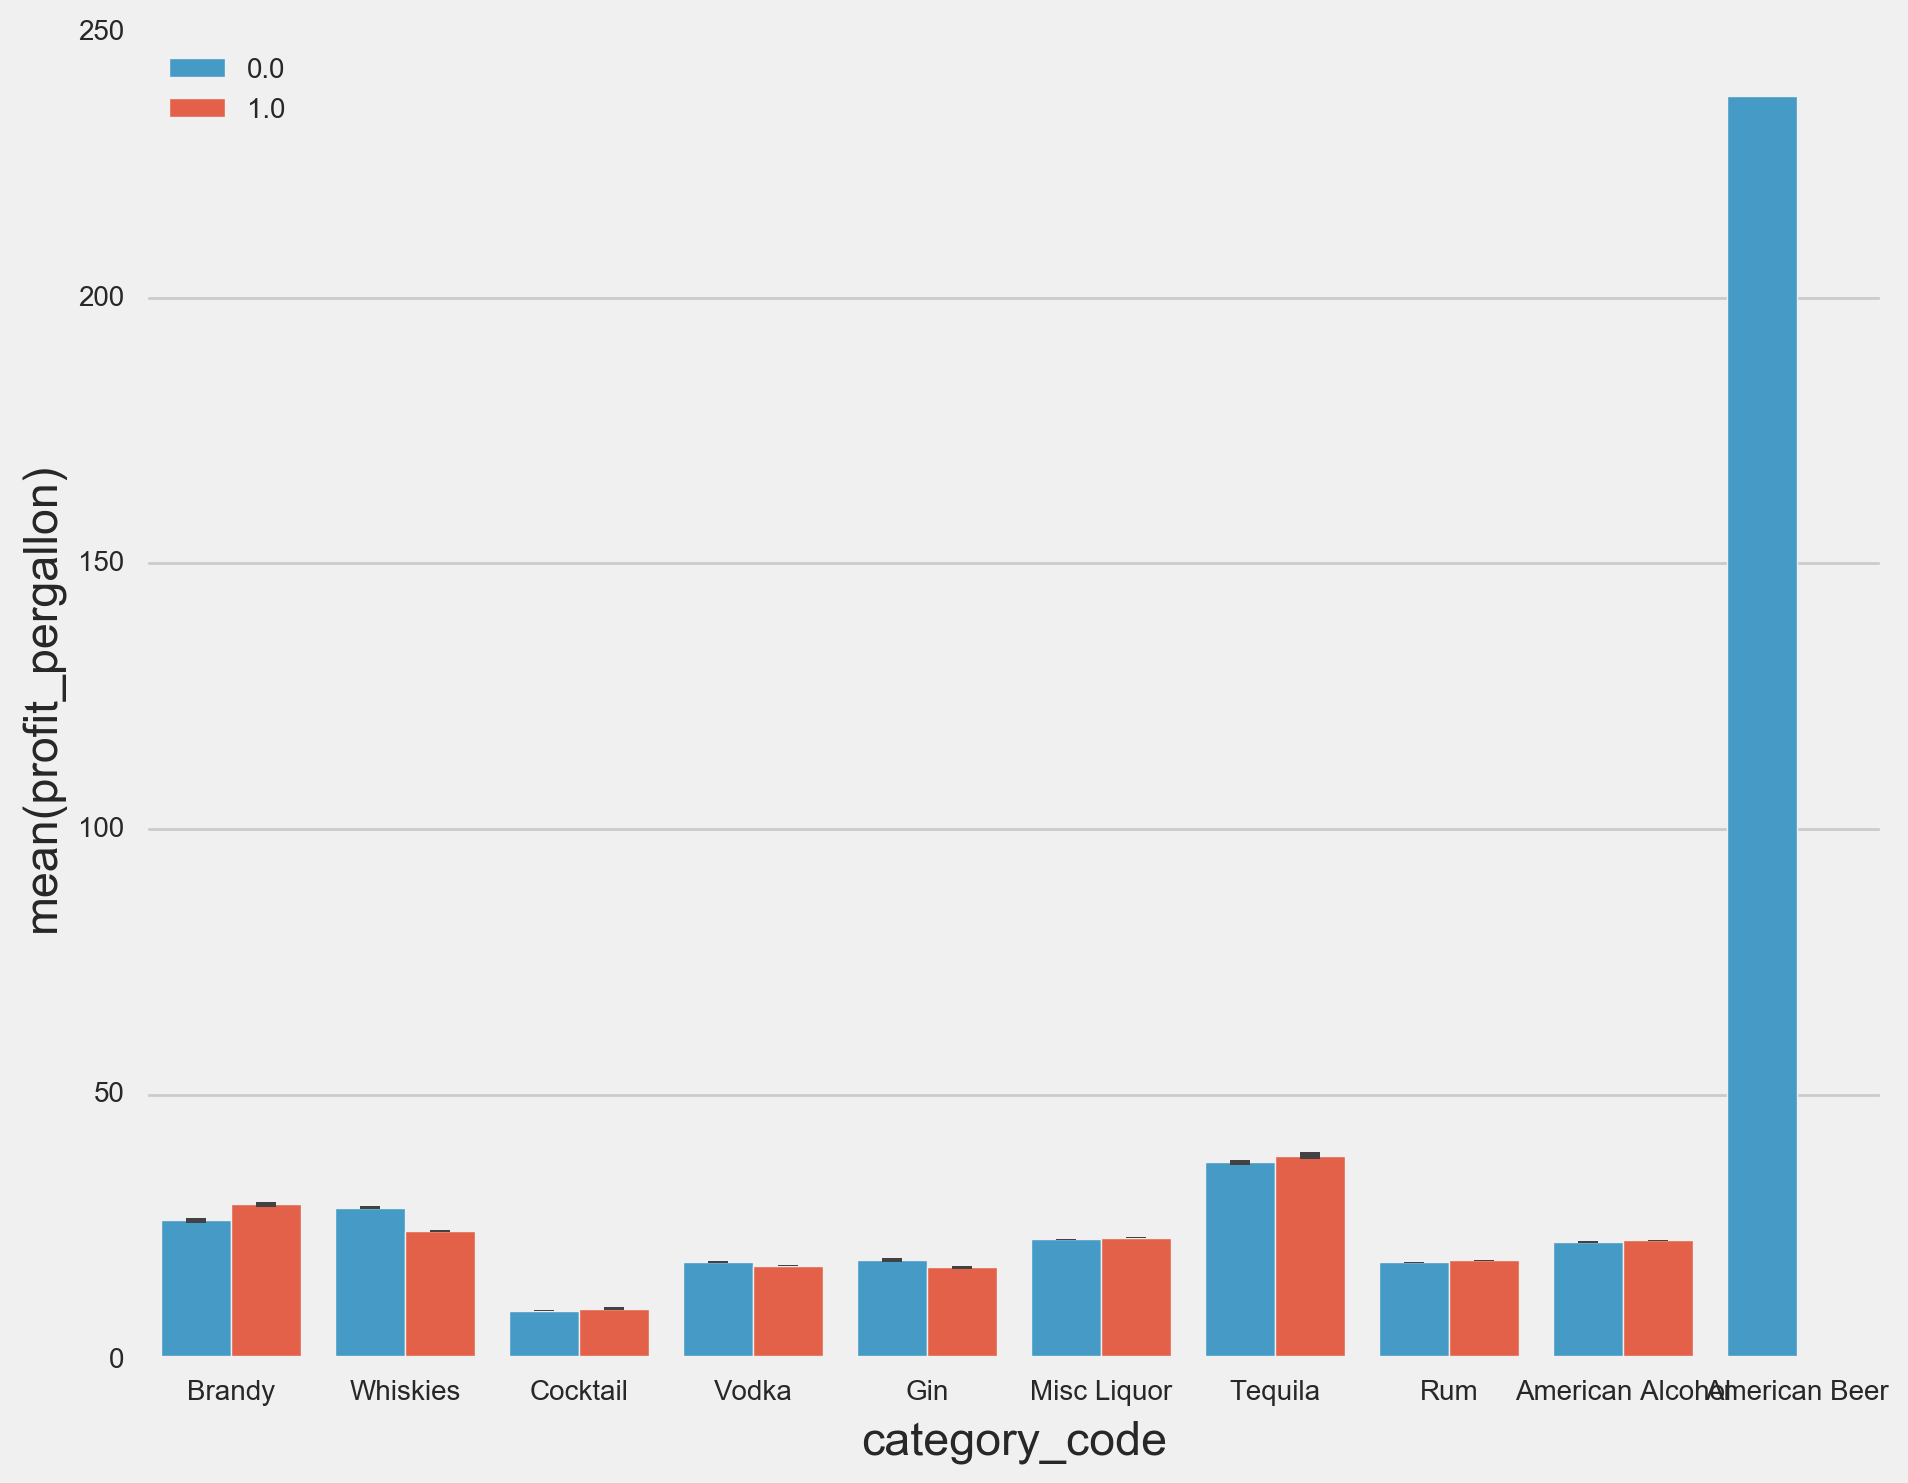

In [565]:
fig = plt.figure(figsize=(10,8))

sns.barplot(x="category_code", y="profit_pergallon", hue="mom_pop", data=iowa)
plt.legend(loc='upper left')

In [566]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,year_2015,Bottles Sold month,month_y,Total Cost (Dollars),profit_x,profit_pergallon,category_code,profit_y,Volume Sold (Gallons)_y,mom_pop
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,1,632.0,78.0,54.00,27.00,11.344538,Brandy,3011.02,181.03,1.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,0,10051.0,78.0,27.50,13.76,34.400000,Whiskies,47695.76,2607.23,0.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,0,10367.0,78.0,302.16,151.20,23.848580,Whiskies,48838.08,2571.33,0.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,0,10924.0,78.0,57.00,28.50,10.288809,Cocktail,48430.73,2631.00,0.0
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1,731.0,78.0,86.40,43.20,7.783784,Vodka,3163.70,216.52,1.0


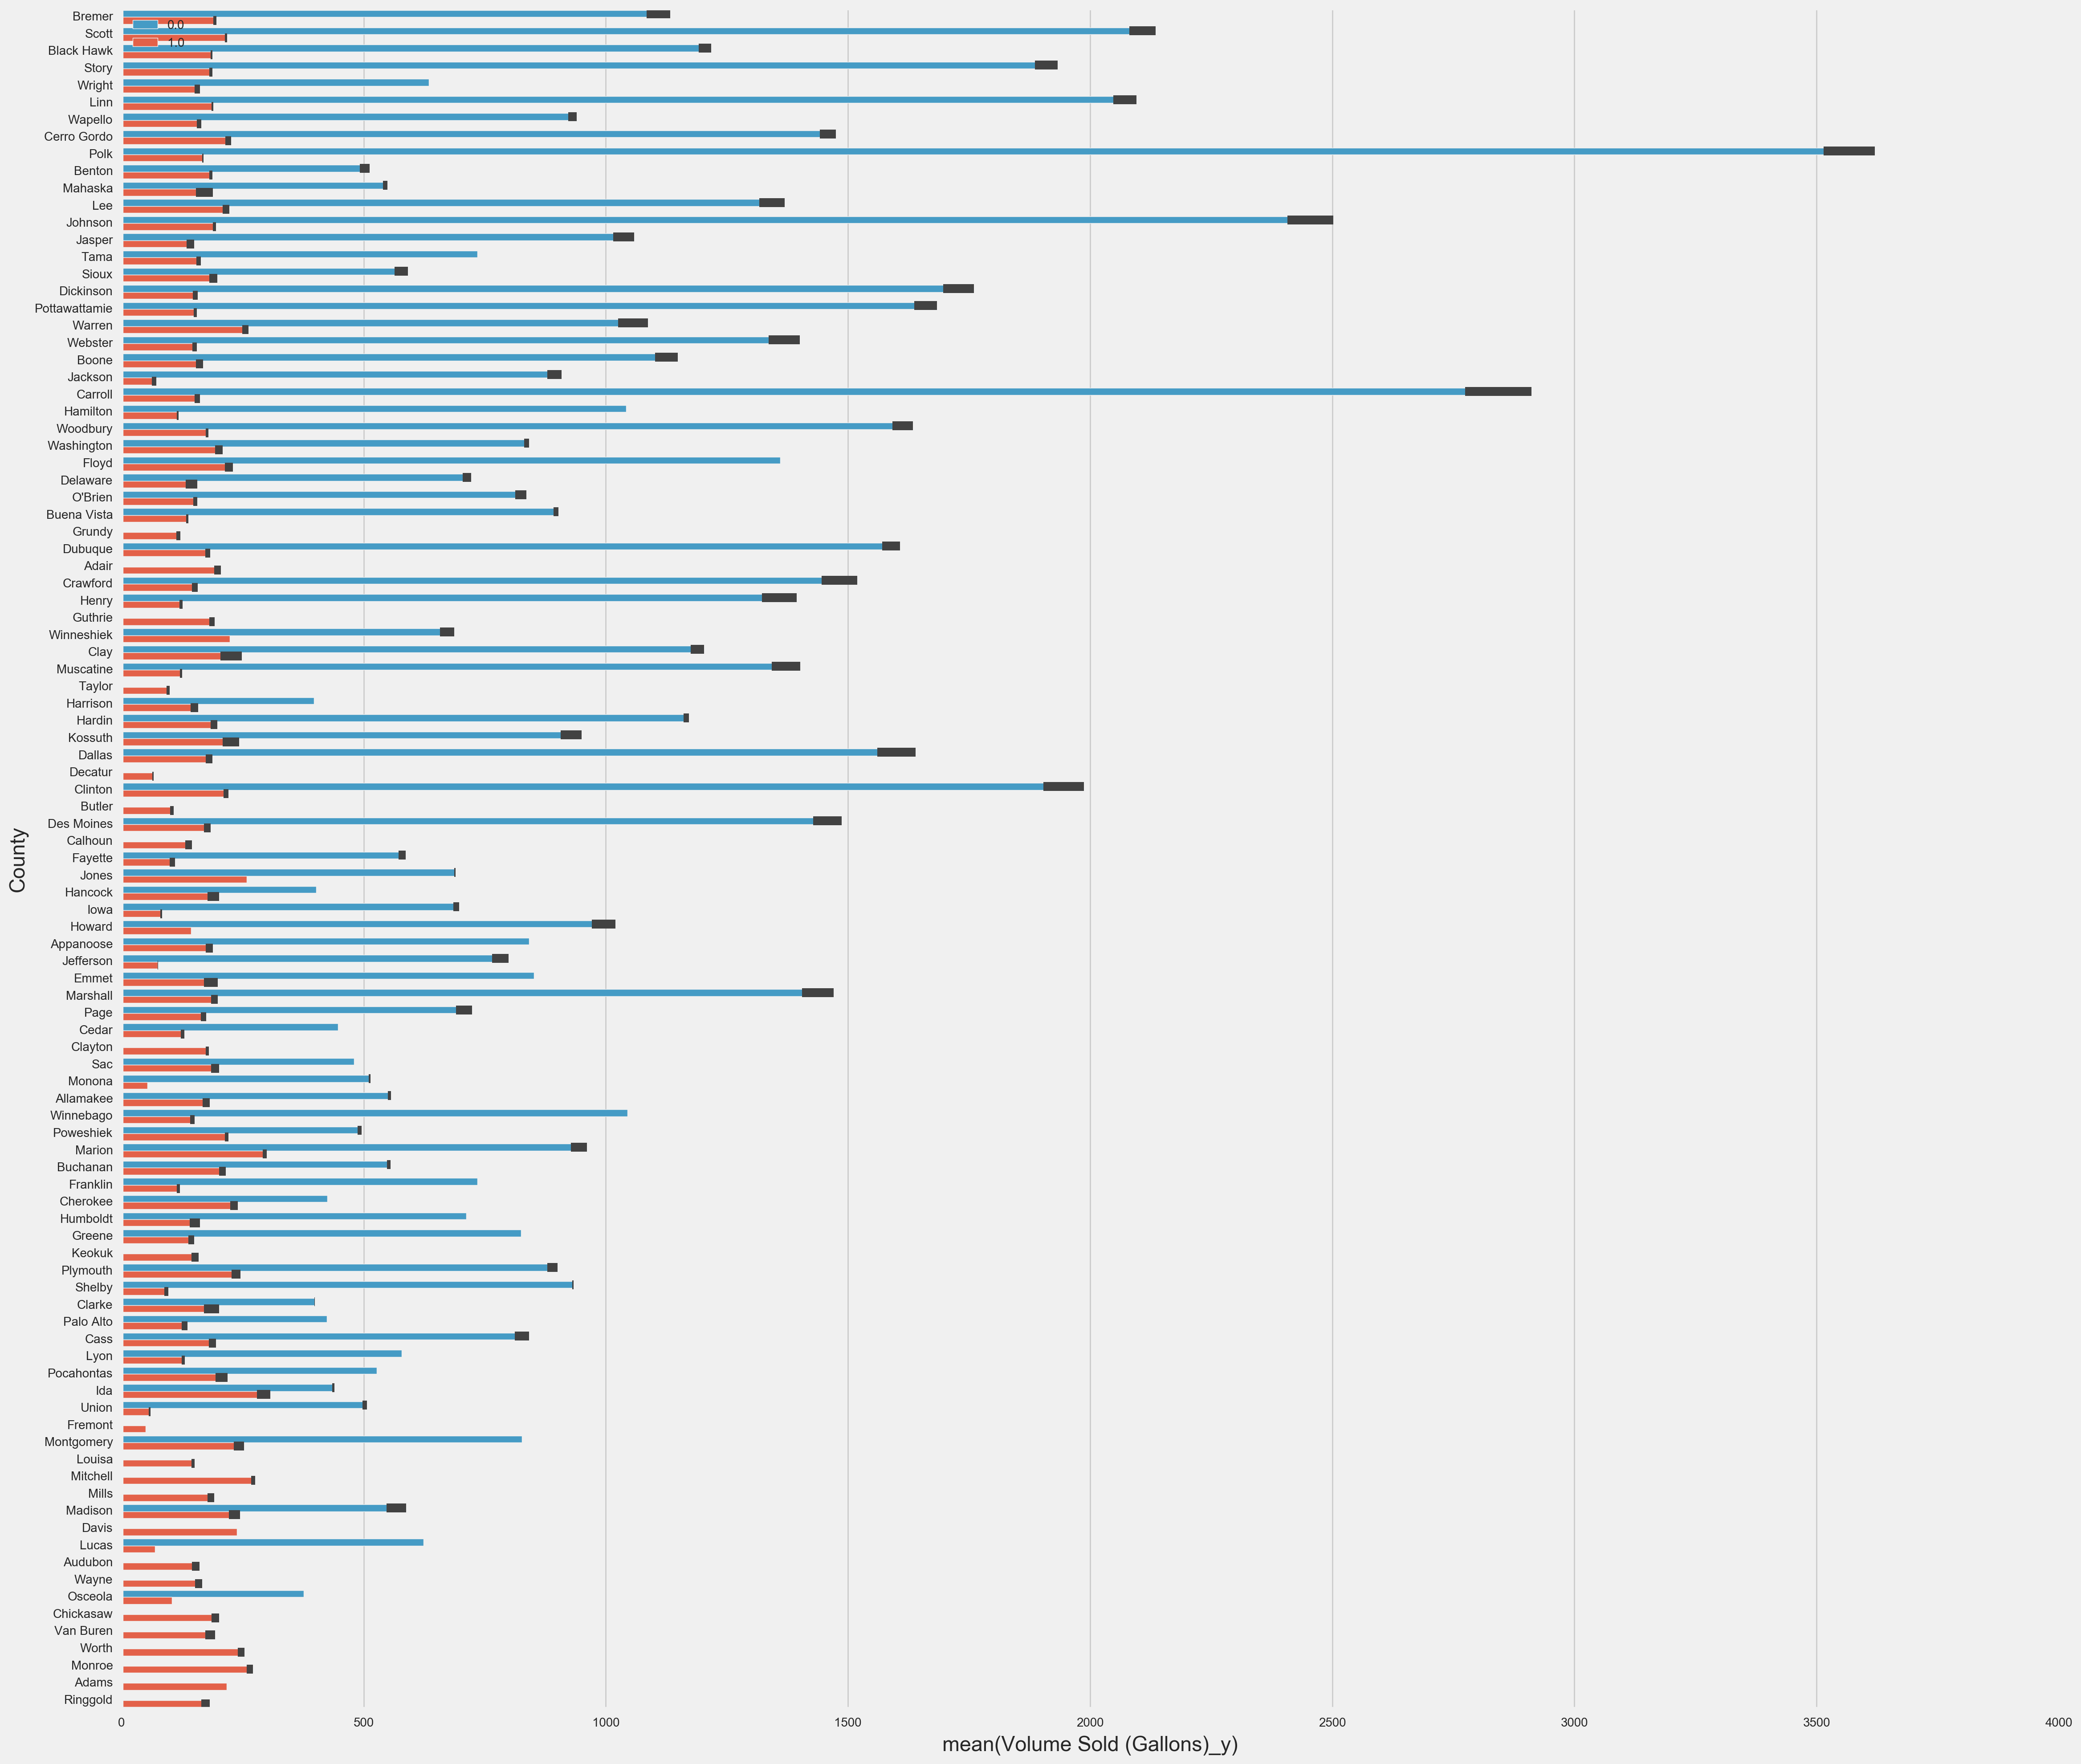

In [567]:
fig = plt.figure(figsize=(25,23))

sns.barplot(x="Volume Sold (Gallons)_y", y="County", hue="mom_pop", data=iowa)
plt.legend(loc='upper left')

## Answer

1. So we see that on an average, mom and pop stores sell more bottles of cocktail, vodka, whiskey and rum. In order to have a tax that doesnt punish big stores or more selling counties, we should tax bottles sold rather than volume sold. Since mom and pop stores generally have smaller sized bottles which sell more easily, a tax on bottles sold would be proportional for both mom and pop stores and big stores.

2. In addition, this would also have lesser burden on American beer which has lesser bottles sold relatively


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [568]:
#Columns for Q1 and Q2 sales per store which we will further group by County
#mask 1 for Q1 2015
Q1_2015=iowa_yr_2015[iowa_yr_2015['month']==1 | 2 | 3]['Total Sales (Dollars)'].groupby(iowa_yr_2015['County']).sum()
#iowa_yr_2015

In [569]:
Q1_2015=Q1_2015.reset_index()
Q1_2015.rename(columns={0:'sales_2015',
                  }, inplace=True)

In [570]:
iowa_yr_2016=iowa[iowa['year_2015']==0]

In [571]:
#Similar mask for 2016
Q1_2016=iowa_yr_2016[iowa_yr_2016['month']==1 | 2 | 3]['Total Sales (Dollars)'].groupby(iowa_yr_2016['County']).sum()
Q1_2016=Q1_2016.reset_index()

In [572]:
Q1_2015=pd.merge(Q1_2015, Q1_2016, on='County', how='left')


In [573]:
Q1_2015.head()

,County,Total Sales (Dollars)_x,Total Sales (Dollars)_y
0,Adair,3273.86,5067.10
1,Adams,1242.95,1162.11
2,Allamakee,4165.58,8820.13
3,Appanoose,4906.55,7153.68
4,Audubon,1485.60,918.66


In [574]:
Q1_2015.rename(columns={'Total Sales (Dollars)_x': 'sales_2015',
                 'Total Sales (Dollars)_y': 'sales_2016' }, inplace=True)

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [575]:
Q1_2015["growth"]=((Q1_2015["sales_2016"]-Q1_2015["sales_2015"])/Q1_2015["sales_2015"])

In [576]:
Q1_2015.sort_values('growth', ascending=False)

,County,sales_2015,sales_2016,growth
26,Decatur,105.78,2062.60,18.498960
35,Fremont,158.88,451.80,1.843656
36,Greene,2075.13,5376.10,1.590729
86,Taylor,673.45,1498.78,1.225525
2,Allamakee,4165.58,8820.13,1.117383
95,Winneshiek,7917.31,14399.63,0.818753
79,Ringgold,628.71,1115.49,0.774252
64,Mills,3583.97,6056.57,0.689905
46,Ida,2845.84,4602.88,0.617406
0,Adair,3273.86,5067.10,0.547745


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

## Answer

1. The location should be Decatur
2. I calculated growth in total sales by county. I did this by taking the stores that are fully functioning in year 2015 and year 2016 to see an annual growth rate from quarter 1 2015 to quarter 1 2016.
3. We see that the county Decatur has an annual sales growth rate of 18% followed by county Fremont which has growth rate of 1.8%

Therefore, i suggest Decatur to be a profitable location for opening up new store

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [577]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,year_2015,Bottles Sold month,month_y,Total Cost (Dollars),profit_x,profit_pergallon,category_code,profit_y,Volume Sold (Gallons)_y,mom_pop
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,1,632.0,78.0,54.00,27.00,11.344538,Brandy,3011.02,181.03,1.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,0,10051.0,78.0,27.50,13.76,34.400000,Whiskies,47695.76,2607.23,0.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,0,10367.0,78.0,302.16,151.20,23.848580,Whiskies,48838.08,2571.33,0.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,0,10924.0,78.0,57.00,28.50,10.288809,Cocktail,48430.73,2631.00,0.0
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1,731.0,78.0,86.40,43.20,7.783784,Vodka,3163.70,216.52,1.0


In [578]:

Q1_2016=iowa_yr_2016[iowa_yr_2016['month']==1 | 2 | 3]['profit_pergallon'].groupby(iowa_yr_2016['category_code']).mean()
Q1_2016=Q1_2016.reset_index()

Q1_2016.rename(columns={'profit_pergallon':'profit_2016',
                  }, inplace=True)
Q1_2016.reset_index()

,index,category_code,profit_2016
0,0,American Alcohol,22.044086
1,1,Brandy,28.385219
2,2,Cocktail,9.182274
3,3,Gin,18.679627
4,4,Misc Liquor,22.833950
5,5,Rum,18.256766
6,6,Tequila,37.194601
7,7,Vodka,18.281359
8,8,Whiskies,27.359290


In [579]:
iowa_yr_2015=iowa[iowa['year_2015']==1]

In [580]:
Q1_2015=iowa_yr_2015[iowa_yr_2015['month']==1 | 2 | 3]['profit_pergallon'].groupby(iowa_yr_2015['category_code']).mean()
Q1_2015=Q1_2015.reset_index()

Q1_2015.rename(columns={'profit_pergallon':'profit_2015',
                  }, inplace=True)
Q1_2015


,category_code,profit_2015
0,American Alcohol,22.227047
1,Brandy,27.021393
2,Cocktail,9.625638
3,Gin,18.179856
4,Misc Liquor,22.546994
5,Rum,18.340383
6,Tequila,36.235855
7,Vodka,18.212328
8,Whiskies,26.339318


In [581]:
Q1_2015=pd.merge(Q1_2015, Q1_2016, on='category_code', how='left')


In [582]:
Q1_2015["growth"]=((Q1_2015["profit_2016"]-Q1_2015["profit_2015"])/Q1_2015["profit_2015"])

In [583]:
Q1_2015.sort_values('growth', ascending=False)

,category_code,profit_2015,profit_2016,growth
1,Brandy,27.021393,28.385219,0.050472
8,Whiskies,26.339318,27.359290,0.038724
3,Gin,18.179856,18.679627,0.027490
6,Tequila,36.235855,37.194601,0.026458
4,Misc Liquor,22.546994,22.833950,0.012727
7,Vodka,18.212328,18.281359,0.003790
5,Rum,18.340383,18.256766,-0.004559
0,American Alcohol,22.227047,22.044086,-0.008231
2,Cocktail,9.625638,9.182274,-0.046061


In [584]:
iowa_brandy= iowa[iowa['category_code']=='Brandy']
iowa_brandy= iowa_brandy.reset_index()

In [585]:
#where is Cocktail sold most
def top_fct(iowa_brandy, num=5, column="County"):
    return iowa_brandy.sort_index(by=column)[-num:]

top_fct(iowa_brandy, num=6)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,...,year_2015,Bottles Sold month,month_y,Total Cost (Dollars),profit_x,profit_pergallon,category_code,profit_y,Volume Sold (Gallons)_y,mom_pop
13519,238778,2016-03-03,5220,MASON CITY,50401,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,205,...,0,NaN,NaN,11.25,5.64,18.800000,Brandy,NaN,NaN,NaN
13845,244560,2016-02-24,5222,CEDAR RAPIDS,52402,NaN,NaN,1052100.0,NaN,420,...,0,NaN,NaN,137.76,68.88,54.236220,Brandy,NaN,NaN,NaN
13968,246818,2016-01-27,5222,CEDAR RAPIDS,52402,NaN,NaN,1052010.0,IMPORTED GRAPE BRANDIES,420,...,0,NaN,NaN,239.76,120.00,50.420168,Brandy,NaN,NaN,NaN
14304,252776,2016-01-13,4308,CORALVILLE,52241,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,...,0,2896.0,78.0,48.00,24.00,18.897638,Brandy,8529.74,405.51,0.0
14749,260312,2016-03-30,3820,SIOUX CITY,51103,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,259,...,0,11547.0,78.0,23.66,11.84,12.869565,Brandy,57650.18,2578.93,0.0
15223,268908,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1052010.0,IMPORTED GRAPE BRANDIES,420,...,0,NaN,NaN,29.99,15.00,75.000000,Brandy,NaN,NaN,NaN


## Answer

### 1. 
The best type of liquor to maximize profit would be american cocktails

### 2.
Yes. The recommended location should change to county Wright if they only plan to sell American Cocktails.